# Init dataset

## Use faker

In [ ]:
!pip install Faker

In [ ]:
from faker import Faker
import pandas as pd
fk = Faker()
data = [fk.profile() for i in range(1000)]
df = pd.DataFrame(data)
df

# Use colab built-in dataviewr

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,Aeronautical engineer,Hamilton-Brown,831-14-9009,"965 William Club\nAnitaland, MT 21462","(30.4422425, 112.995721)",A+,"[https://estrada.com/, http://www.baxter.biz/]",sandrarobertson,Donald Simpson,M,"8456 Willie Lane\nOlivermouth, OR 51488",riversbrad@gmail.com,2002-08-23
1,Recycling officer,Harper PLC,028-42-3363,558 Rodriguez Tunnel Apt. 806\nWest Gabrieltow...,"(89.3699685, -49.843160)",B+,"[http://roberts.org/, https://rivera.com/]",christopherrosario,Bryan Peterson,M,"PSC 5887, Box 7091\nAPO AE 61589",heidi17@hotmail.com,2017-10-08
2,Financial manager,Silva-Matthews,328-88-3939,"57188 Thompson Mill Suite 941\nZimmermanport, ...","(51.460118, -165.779133)",B-,"[https://pratt.com/, https://www.cunningham.ne...",christinakirk,John Perkins,M,06076 Breanna Flats Suite 915\nLake Zacharypor...,nancychan@hotmail.com,1968-07-08
3,Veterinary surgeon,Miller-Johnson,313-53-1157,1456 Miranda Spring Suite 232\nNew Rebeccaberg...,"(-45.1606185, 61.645728)",A-,"[http://curtis-andrews.com/, http://www.haas.n...",valenciavictor,Michael Ford,M,"6250 Mathis Crossing\nWilsonmouth, CO 24314",xbarnett@hotmail.com,1939-05-16
4,Quality manager,Nguyen Group,564-62-9625,"8086 Paul Falls\nMaxwellville, IA 67141","(-47.688660, -133.122787)",O+,"[http://peterson-davis.com/, http://francis.com/]",bishopjonathan,Kevin Moreno,M,"00972 Edward Extensions\nSouth Kellie, CT 48965",bryan88@yahoo.com,1999-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Engineer, drilling",Martin-Hill,571-45-3429,"9909 Johnson Ridges Suite 398\nWest Brian, WA ...","(3.4316165, 31.204262)",O-,"[https://www.jordan-parker.biz/, https://lee.c...",heidi93,Kyle Arnold,M,USNV Salazar\nFPO AE 85226,jonesmelissa@hotmail.com,1972-08-16
996,Osteopath,Stevens Ltd,055-43-0159,"PSC 6563, Box 7700\nAPO AE 54540","(-52.724851, -130.429173)",AB+,[https://www.carney-carter.com/],imiranda,Cristina Sanchez,F,72290 Joshua Circles Suite 597\nPort Barbaraha...,colebarber@hotmail.com,1932-07-03
997,"Restaurant manager, fast food",Ford-Figueroa,578-09-9247,"9305 Christopher Forest Suite 583\nPatelstad, ...","(-87.8000065, 1.589411)",B-,"[http://www.rodriguez-lang.biz/, https://www.j...",cfernandez,Jillian Perez,F,"5746 Hernandez Manors\nLake Melissaland, NY 01172",tamaracabrera@gmail.com,1978-10-15
998,"Horticulturist, amenity",Rogers Ltd,670-65-6367,"4532 Schmidt Station\nChristopherview, MN 46546","(-89.586340, -76.899843)",A-,[http://greene.com/],nealkimberly,John Howe,M,"294 Theresa Island Suite 015\nWillismouth, PW ...",brenthuff@gmail.com,1997-05-22


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['blood_group'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['blood_group', 'sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['birthdate', 'count()', 'blood_group'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['birthdate', 'count()', 'sex'], **{})
chart

In [ ]:
pd.reset_option('all')

<ipython-input-135-056908e7e3ef>:1: FutureWarning:

column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.

<ipython-input-135-056908e7e3ef>:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

<ipython-input-135-056908e7e3ef>:1: FutureWarning:


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.




<Axes: xlabel='blood_group'>

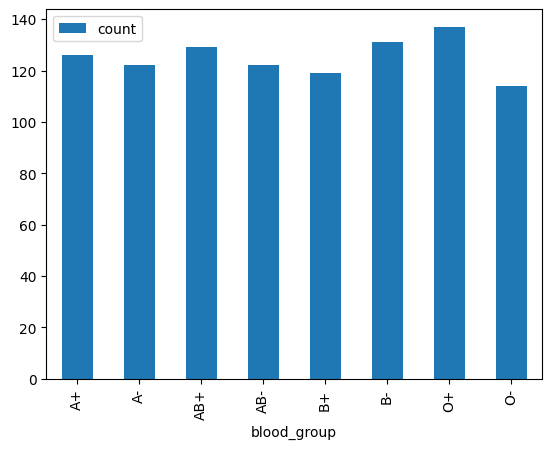

In [ ]:
from pandas.core.indexes.interval import le
# by default pandas uses matplotlib as the plotting backend
df_blood = df.groupby('blood_group').count().reset_index()
df_blood.rename(columns={'name': 'count'}, inplace=True)
df_blood.plot.bar(x='blood_group', y='count')

In [ ]:
pd.options.plotting.backend = 'plotly'
df_blood.plot.bar(x='blood_group', y='count')

In [ ]:
df_blood.plot.bar(x='blood_group', y='count', template='none', color='blood_group') # for all themes see https://plotly.com/python/templates/

# time series data uses line chart

In [ ]:
df['year'] = pd.to_datetime(df['birthdate']).dt.year
df_blood_year = df.groupby(['year'])['name'].count().reset_index()
df_blood_year.rename(columns={'name': 'count'}, inplace=True)
df_blood_year

,year,count
0,1907,2
1,1908,4
2,1909,3
3,1910,12
4,1911,4
...,...,...
112,2019,11
113,2020,3
114,2021,9
115,2022,6


In [ ]:
df_blood_year.plot.line(x='year', y='count', template='none', color_discrete_map={"count": "red"})

### change plotly default template

In [ ]:
from plotly import io as pio

pio.templates.default = 'none'

## Multiple fields

In [ ]:
# Pivot table first

df_pivot = df.pivot_table(index='year', columns='blood_group', values='name', aggfunc='count').reset_index()
df_pivot

blood_group,year,A+,A-,AB+,AB-,B+,B-,O+,O-
0,1907,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,1908,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN
2,1909,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0
3,1910,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0
4,1911,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
112,2019,NaN,1.0,1.0,2.0,1.0,1.0,4.0,1.0
113,2020,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
114,2021,1.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN
115,2022,1.0,1.0,1.0,NaN,NaN,NaN,3.0,NaN


<Axes: xlabel='year'>

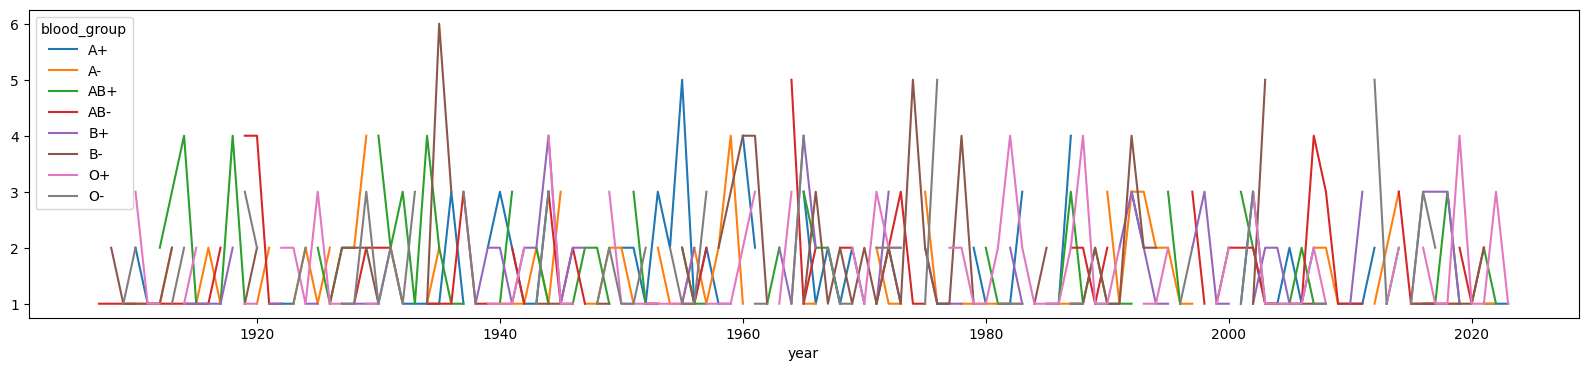

In [ ]:
pd.reset_option('plotting.backend')
df_pivot.plot.line(x='year', figsize=(20, 4))

In [ ]:
pd.set_option('plotting.backend', 'plotly')
df_pivot.plot.line(x='year',y=["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"])

In [ ]:
df_pivot.backfill().plot.line(x='year', y=["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"], line_shape='spline')

# Pie chart

In [ ]:
from plotly import express as px
px.pie(df_blood, names='blood_group', values='count', color_discrete_sequence=px.colors.sequential.RdBu) # for more color sequence see https://plotly.com/python/builtin-colorscales/

# Cumulated chart

In [ ]:
from re import T
df_ccumulated = df.groupby(['blood_group','year'])['name'].count().reset_index()
df_ccumulated.plot.bar(x='year',
                       y='name',
                       color='blood_group',
                       color_discrete_sequence=px.colors.sequential.RdBu,
                       title='Blood Group by Year')

# Scatter plot

In [ ]:
import plotly.express as px
df_iris = px.data.iris()

In [ ]:
dir(px.data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'carshare',
 'election',
 'election_geojson',
 'experiment',
 'gapminder',
 'iris',
 'medals_long',
 'medals_wide',
 'stocks',
 'tips',
 'wind']

In [ ]:
px.scatter(df_iris, x='sepal_width', y='sepal_length', color='species', size='sepal_length', trendline='ols')

In [ ]:
px.histogram(df_iris, x='sepal_width', color='species')

## Violin plot

In [ ]:
px.violin(df_iris, y='sepal_width', color='species', points='all', box=True)

## Heatmap

In [ ]:
px.density_heatmap(df_iris, x='sepal_width', y='petal_width', nbinsx=20, nbinsy=20, color_continuous_scale='RdBu')

## Multi-type plot

In [ ]:
df_stock = px.data.stocks()
df_stock['change'] = df_stock['GOOG'] - df_stock['GOOG'].shift(1)
df_stock

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT,change
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988,0.018172
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524,0.013836
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561,0.034775
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708,-0.058010
...,...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717,0.032353
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239,0.006541
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896,0.001597
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472,0.002087


In [ ]:
from plotly.graph_objs import YAxis
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
  go.Bar(x=df_stock['date'], y=df_stock['GOOG'], name="GOOG"),
  secondary_y=False
)


fig.add_trace(
  go.Scatter(x=df_stock['date'], y=df_stock['change'], name="change"),
  secondary_y=True,
)
fig.update_yaxes(range = [0,4], secondary_y=False)
fig.show()

# Low code visualization

https://colab.research.google.com/drive/1jLve72KRFT-B6x8C3Z-wqtV5NSCV3klF#scrollTo=cjo4noUQbRKP